In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-0.39581258926904184 16.18367115227673
-21.985270722421987 -132.86600811917907
-80.58242604751706 -125.11921793795466
60.59523759799947 -52.88286453306566
19.43746748009538 56.63750680624494
81.36839714830901 40.68787526198824
68.77486393534565 61.453049964405096
-82.39528608100173 130.27815114120153
-62.136193213772515 -70.8855994244621
-45.162437214427065 -159.9699614634464
-55.04761754430007 -144.61595039620866
-47.25228803652412 -147.24215515540953
42.951054480096076 91.18241216953845
-53.6360724245951 74.53168138176571
-39.72397233039316 -13.657235348709378
13.719513059675734 -168.07070469435078
60.51778950327727 94.47852554055692
-3.193193328406494 58.345951118186974
7.169989078208232 155.52748338092164
89.87391110388072 -138.4458915712799
60.8951519463852 -132.60539836935232
58.558076552750634 31.4550555535279
84.36609584341852 -149.0550429006884
-8.767100266113431 43.4562788319227
57.66195869254554 -21.35028366807876
-44.845371520887596 -27.658263101183564
38.94523024630857 -12

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    #generally, it isn't a good idea to add the pass statement to the except block. Ideally, we want to handle or catch each
    #error as it happens and do something specific like add another try block or print out the error.

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | owando
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | salalah
Processing Record 5 of Set 1 | ostrovnoy
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | severo-yeniseyskiy
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | krechevitsy
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | mitsamiouli
Processing Re

Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | boyolangu
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | beloha
Processing Record 46 of Set 4 | basco
Processing Record 47 of Set 4 | andenes
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | tabou
Processing Record 50 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | chateaubelair
Processing Record 3 of Set 5 | lincoln
Processing Record 4 of Set 5 | alamogordo
Processing Record 5 of Set 5 | port-cartier
Processing Record 6 of Set 5 | natal
Processing Record 7 of Set 5 | bonnyville
Processing Record 8 of Set 5 | hobyo
Processing Record 9 of Set 5 | yulara
Processing Record 10 of Set 5 | boa vista
Processing Record 11 of Set 5 | saint-philippe
Processing Re

Processing Record 27 of Set 8 | jaen
Processing Record 28 of Set 8 | azimur
City not found. Skipping...
Processing Record 29 of Set 8 | san isidro
Processing Record 30 of Set 8 | sorvag
City not found. Skipping...
Processing Record 31 of Set 8 | beian
Processing Record 32 of Set 8 | moldava nad bodvou
Processing Record 33 of Set 8 | chara
Processing Record 34 of Set 8 | flinders
Processing Record 35 of Set 8 | pueblo
Processing Record 36 of Set 8 | vzmorye
Processing Record 37 of Set 8 | skjervoy
Processing Record 38 of Set 8 | ambilobe
Processing Record 39 of Set 8 | karpathos
Processing Record 40 of Set 8 | palmer
Processing Record 41 of Set 8 | ouallam
Processing Record 42 of Set 8 | kachug
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | eureka
Processing Record 45 of Set 8 | nanga eboko
Processing Record 46 of Set 8 | eyl
Processing Record 47 of Set 8 | tiznit
Processing Record 48 of Set 8 | tsiroanomandidy
Processing Record 49 of Set 8 | half moon bay
Proc

Processing Record 16 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 17 of Set 12 | kununurra
Processing Record 18 of Set 12 | hovd
Processing Record 19 of Set 12 | westpunt
City not found. Skipping...
Processing Record 20 of Set 12 | ca mau
Processing Record 21 of Set 12 | ventspils
Processing Record 22 of Set 12 | batemans bay
Processing Record 23 of Set 12 | sao paulo de olivenca
Processing Record 24 of Set 12 | grand-santi
Processing Record 25 of Set 12 | talavera
Processing Record 26 of Set 12 | alotau
City not found. Skipping...
Processing Record 27 of Set 12 | olinda
Processing Record 28 of Set 12 | key west
Processing Record 29 of Set 12 | nelson bay
Processing Record 30 of Set 12 | urfa
City not found. Skipping...
Processing Record 31 of Set 12 | mount darwin
Processing Record 32 of Set 12 | saint anthony
Processing Record 33 of Set 12 | kindu
Processing Record 34 of Set 12 | indian harbour beach
Processing Record 35 of Set 12 | ayan
Processing Record 36 of S

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Owando,-0.4819,15.8999,83.08,43,96,1.41,CG,2022-07-14 18:31:02
1,Rikitea,-23.1203,-134.9692,66.42,83,100,7.65,PF,2022-07-14 18:31:03
2,Paamiut,61.9940,-49.6678,44.08,87,100,5.30,GL,2022-07-14 18:31:03
3,Salalah,17.0151,54.0924,77.79,92,86,5.28,OM,2022-07-14 18:28:11
4,Ostrovnoy,68.0531,39.5131,61.29,91,100,11.52,RU,2022-07-14 18:31:03
5,New Norfolk,-42.7826,147.0587,43.92,90,94,2.33,AU,2022-07-14 18:31:04
6,Ushuaia,-54.8000,-68.3000,33.46,75,0,2.30,AR,2022-07-14 18:31:04
7,Avarua,-21.2078,-159.7750,73.45,64,100,17.27,CK,2022-07-14 18:31:04
8,Mataura,-46.1927,168.8643,36.48,99,100,3.38,NZ,2022-07-14 18:31:05
9,Hami,42.8000,93.4500,78.55,21,9,7.11,CN,2022-07-14 18:31:05


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Owando,CG,2022-07-14 18:31:02,-0.4819,15.8999,83.08,43,96,1.41
1,Rikitea,PF,2022-07-14 18:31:03,-23.1203,-134.9692,66.42,83,100,7.65
2,Paamiut,GL,2022-07-14 18:31:03,61.9940,-49.6678,44.08,87,100,5.30
3,Salalah,OM,2022-07-14 18:28:11,17.0151,54.0924,77.79,92,86,5.28
4,Ostrovnoy,RU,2022-07-14 18:31:03,68.0531,39.5131,61.29,91,100,11.52
5,New Norfolk,AU,2022-07-14 18:31:04,-42.7826,147.0587,43.92,90,94,2.33
6,Ushuaia,AR,2022-07-14 18:31:04,-54.8000,-68.3000,33.46,75,0,2.30
7,Avarua,CK,2022-07-14 18:31:04,-21.2078,-159.7750,73.45,64,100,17.27
8,Mataura,NZ,2022-07-14 18:31:05,-46.1927,168.8643,36.48,99,100,3.38
9,Hami,CN,2022-07-14 18:31:05,42.8000,93.4500,78.55,21,9,7.11


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

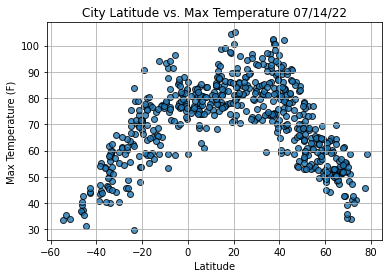

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

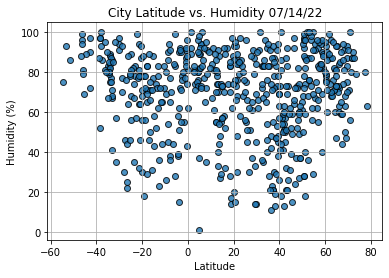

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

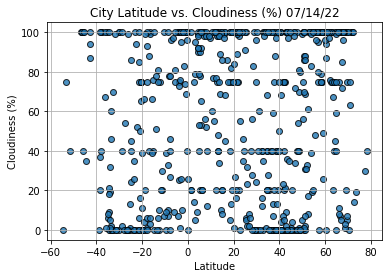

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

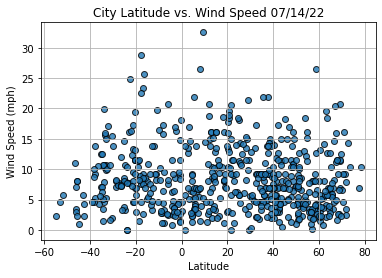

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
#there is no output for the cell above because we haven't called the function with the five parameters yet. 
#to get an output from a function, we need to call the function with the correct number of parameters or arguments
#for the function mod 6.4.2

In [25]:
# create the hemisphere dataframes example 6.4.2 using loc and an index number 
index13 = city_data_df.loc[13]
index13

City           Severo-Yeniseyskiy
Country                        RU
Date          2022-07-14 18:31:06
Lat                       60.3725
Lng                       93.0408
Max Temp                    44.87
Humidity                       76
Cloudiness                     94
Wind Speed                   3.09
Name: 13, dtype: object

In [26]:
# we can also filter a DF based on a value of a row like if we wanted all Northern Hemi latitudes for latitudes greater than 
# or equal to 0, we filter the DF using code 
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
577     True
578     True
579     True
580     True
581    False
Name: Lat, Length: 582, dtype: bool

In [27]:
#we can use the loc method on the DF with a conditional filter to get latitudes greater than or equal to 0 and then 
# use the DF head method to look at a window
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Paamiut,GL,2022-07-14 18:31:03,61.9940,-49.6678,44.08,87,100,5.30
3,Salalah,OM,2022-07-14 18:28:11,17.0151,54.0924,77.79,92,86,5.28
4,Ostrovnoy,RU,2022-07-14 18:31:03,68.0531,39.5131,61.29,91,100,11.52
9,Hami,CN,2022-07-14 18:31:05,42.8000,93.4500,78.55,21,9,7.11
11,Jamestown,US,2022-07-14 18:26:37,42.0970,-79.2353,76.01,51,20,6.91


In [28]:
#now assign the DF to a variable and do the same for the southern hemisphere
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

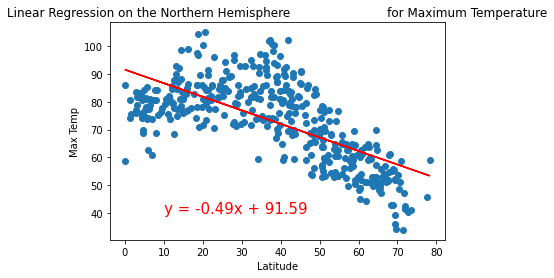

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

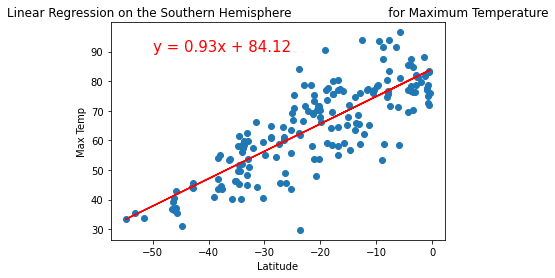

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

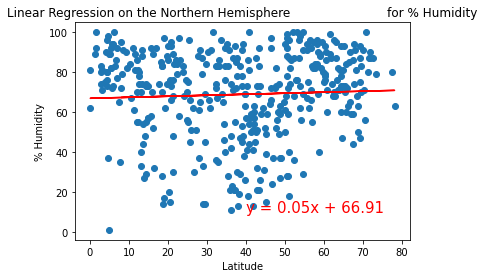

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

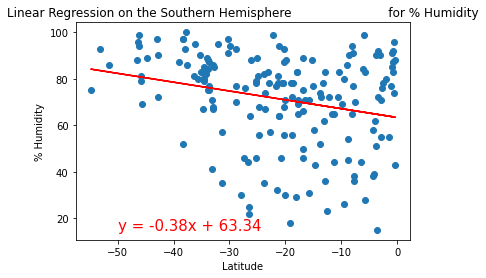

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

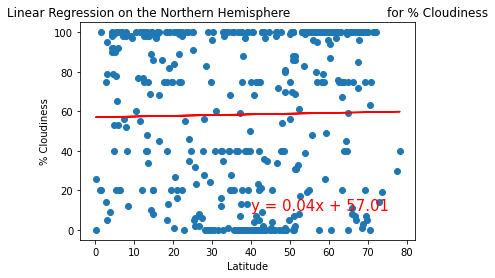

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

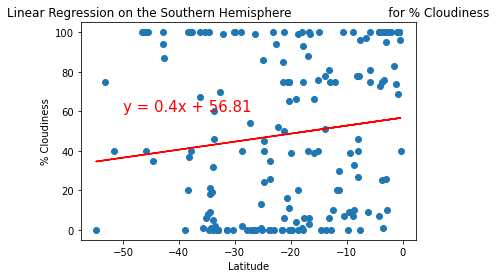

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

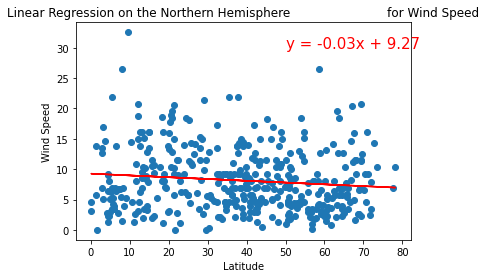

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(50,30))

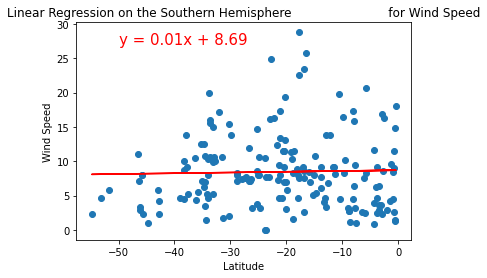

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,27))